### Hazard Map combination of all the masks

In [1]:
from scipy.fftpack import ifft, idct, dct
import numpy as np
import math
import matplotlib.pyplot as plt 
import tensorflow as tf
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

### Base Image

In [2]:
image_path = r"D:\Projects\APEX PROJECT\Ongoing_Project\Lunar_Hazard_Map\data\cropped_oth.png"

In [3]:
f = plt.figure() 
img0 = plt.imread(image_path)

<Figure size 640x480 with 0 Axes>

In [4]:
img0.shape

(400, 400, 3)

In [5]:
print(img0[0][0])

[0.13333334 0.13333334 0.13333334]


In [6]:
img0max=1.0
img0min=0.0
    
color_constant = 255/(img0max-img0min) 
for i in range(len(img0)):
    for j in range(len(img0[0])):
        for k in range(len(img0[0][0])):
            img0[i][j][k] = math.floor((img0[i][j][k]-img0min)*color_constant)

### Shadow (Green)

In [7]:
image_path = r"D:\Projects\APEX PROJECT\Ongoing_Project\Lunar_Hazard_Map\notebooks\Hazard_Map\Shadow\shadow_mask.tif"

In [8]:
f = plt.figure() 
img1 = plt.imread(image_path)

<Figure size 640x480 with 0 Axes>

In [9]:
img1.shape

(400, 400, 4)

In [10]:
print(img1[0][0])

[  0 255   0 255]


### Slope (Blue)

In [11]:
image_path = r"D:\Projects\APEX PROJECT\Ongoing_Project\Lunar_Hazard_Map\notebooks\Hazard_Map\Slope\slope_mask.tif"

In [12]:
f = plt.figure() 
img2 = plt.imread(image_path)

<Figure size 640x480 with 0 Axes>

In [13]:
img2.shape

(400, 400, 4)

In [14]:
print(img2[0][0])

[0 0 0 0]


### Crater (Red)

In [15]:
image_path = r"D:\Projects\APEX PROJECT\Ongoing_Project\Lunar_Hazard_Map\notebooks\Hazard_Map\Crater_Detection\crater_mask.tif"

In [16]:
f = plt.figure() 
img3 = plt.imread(image_path)

<Figure size 640x480 with 0 Axes>

In [17]:
img3.shape

(400, 400, 4)

In [18]:
print(img3[0][0])

[0 0 0 0]


### Process

In [19]:
lis = [(1,0),(1,1),(0,1),(-1,1),(0,-1),(1,-1),(-1,0),(-1,-1)]
im_len = max(len(img1),len(img2),len(img3))
im_wid = max(len(img1[0]),len(img2[0]),len(img3[0]))
correction_factor = 0.05
img4 = np.zeros((im_len,im_wid,4))
img4_img = Image.fromarray(img4.astype(np.uint8))
img5 = np.zeros((im_len,im_wid,4))
img5_img = Image.fromarray(img5.astype(np.uint8))
tx = 0
ty = 0
tz = 0
tl = 255
rx = 0
ry = 0
rz = 0
rl = 0
for i in range(im_len):
    for j in range(im_wid):
        tx,ty,tz = img0[i][j]
        rx = ry = rz = 0
        rl = 255
        if i<len(img1) and j<len(img1[0]) and img1[i][j][1]==255: 
            tx = 255
            rx = 255
        if i<len(img2) and j<len(img2[0]) and img2[i][j][2]==255: 
            tx = 255
            rx = 255
        if i<len(img3) and j<len(img3[0]) and img3[i][j][0]==255: 
            tx = 255
            rx = 0
        if (rx==255 and ry==0 and rz==0): 
            ry=0
            rx=0
            rz=0
            rl=255
        else:
            ry=255
            rx=0
            rz=0
            ty=255
            tx=0
            tz=0
            
        img4_img.putpixel((j,i),(rx,ry,rz,rl))    
        img5_img.putpixel((j,i),(math.floor(tx),math.floor(ty),math.floor(tz),tl))

In [20]:
without_slope = np.array(img5_img)

ValueError: Could not save to JPEG for display

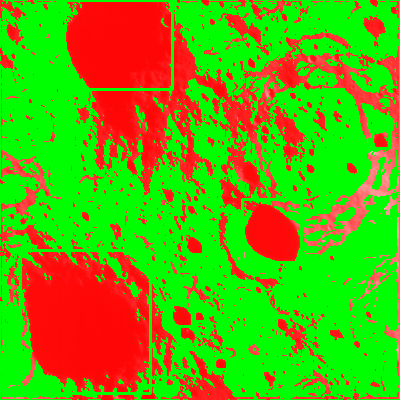

In [21]:
img5_img

In [22]:
img5_img.save(r"D:/Projects/APEX PROJECT/Ongoing_Project/Lunar_Hazard_Map/notebooks/Hazard_Map/hazard_map_critical.tif")

ValueError: Could not save to JPEG for display

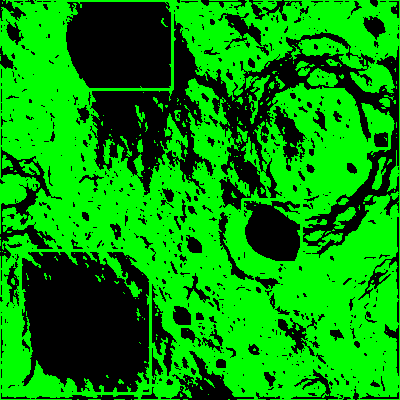

In [23]:
img4_img

In [24]:
img4_img.save(r"D:/Projects/APEX PROJECT/Ongoing_Project/Lunar_Hazard_Map/notebooks/Hazard_Map/hazard_mask_critical.tif")

### Super Resolved Image

In [25]:
image_path = r"D:\Projects\APEX PROJECT\Ongoing_Project\Lunar_Hazard_Map\data\super_oth.png"

In [26]:
f = plt.figure() 
img0 = plt.imread(image_path)

<Figure size 640x480 with 0 Axes>

In [27]:
img0.shape

(2000, 2000, 3)

In [28]:
print(img0[0][0])

[0.20392157 0.20392157 0.20392157]


In [29]:
img0max=1.0
img0min=0.0
    
color_constant = 255/(img0max-img0min) 
for i in range(len(img0)):
    for j in range(len(img0[0])):
        for k in range(len(img0[0][0])):
            img0[i][j][k] = math.floor((img0[i][j][k]-img0min)*color_constant)

In [30]:
image_path = r"D:\Projects\APEX PROJECT\Ongoing_Project\Lunar_Hazard_Map\notebooks\Hazard_Map\Shadow\super_shadow_mask.tif"

In [31]:
f = plt.figure() 
img1 = plt.imread(image_path)

<Figure size 640x480 with 0 Axes>

In [32]:
img1.shape

(2000, 2000, 4)

In [33]:
print(img1[0][0])

[0 0 0 0]


In [34]:
image_path = r"D:\Projects\APEX PROJECT\Ongoing_Project\Lunar_Hazard_Map\notebooks\Hazard_Map\Slope\super_slope_mask.tif"

In [35]:
f = plt.figure() 
img2 = plt.imread(image_path)

<Figure size 640x480 with 0 Axes>

In [36]:
img2.shape

(2000, 2000, 4)

In [37]:
print(img2[0][0])

[0 0 0 0]


In [38]:
image_path = r"D:\Projects\APEX PROJECT\Ongoing_Project\Lunar_Hazard_Map\notebooks\Hazard_Map\Crater_Detection\super_crater_mask.tif"

In [39]:
f = plt.figure() 
img3 = plt.imread(image_path)

<Figure size 640x480 with 0 Axes>

In [40]:
img3.shape

(2000, 2000, 4)

In [41]:
print(img3[0][0])

[0 0 0 0]


In [42]:
lis = [(1,0),(1,1),(0,1),(-1,1),(0,-1),(1,-1),(-1,0),(-1,-1)]
im_len = max(len(img1),len(img2),len(img3))
im_wid = max(len(img1[0]),len(img2[0]),len(img3[0]))
correction_factor = 0.05
img4 = np.zeros((im_len,im_wid,4))
img4_img = Image.fromarray(img4.astype(np.uint8))
img5 = np.zeros((im_len,im_wid,4))
img5_img = Image.fromarray(img5.astype(np.uint8))
tx = 0
ty = 0
tz = 0
tl = 255
rx = 0
ry = 0
rz = 0
rl = 0
for i in range(im_len):
    for j in range(im_wid):
        tx,ty,tz = img0[i][j]
        rx = ry = rz = 0
        rl = 255
        if i<len(img1) and j<len(img1[0]) and img1[i][j][1]==255: 
            tx = 255
            rx = 255
        if i<len(img2) and j<len(img2[0]) and img2[i][j][2]==255: 
            tx = 255
            rx = 255
        if i<len(img3) and j<len(img3[0]) and img3[i][j][0]==255: 
            tx = 255
            rx = 0
        if (rx==255 and ry==0 and rz==0): 
            ry=0
            rx=0
            rz=0
            rl=255
        else:
            ry=255
            rx=0
            rz=0
            ty=255
            tx=0
            tz=0
            
        img4_img.putpixel((j,i),(rx,ry,rz,rl))    
        img5_img.putpixel((j,i),(math.floor(tx),math.floor(ty),math.floor(tz),tl))

ValueError: Could not save to JPEG for display

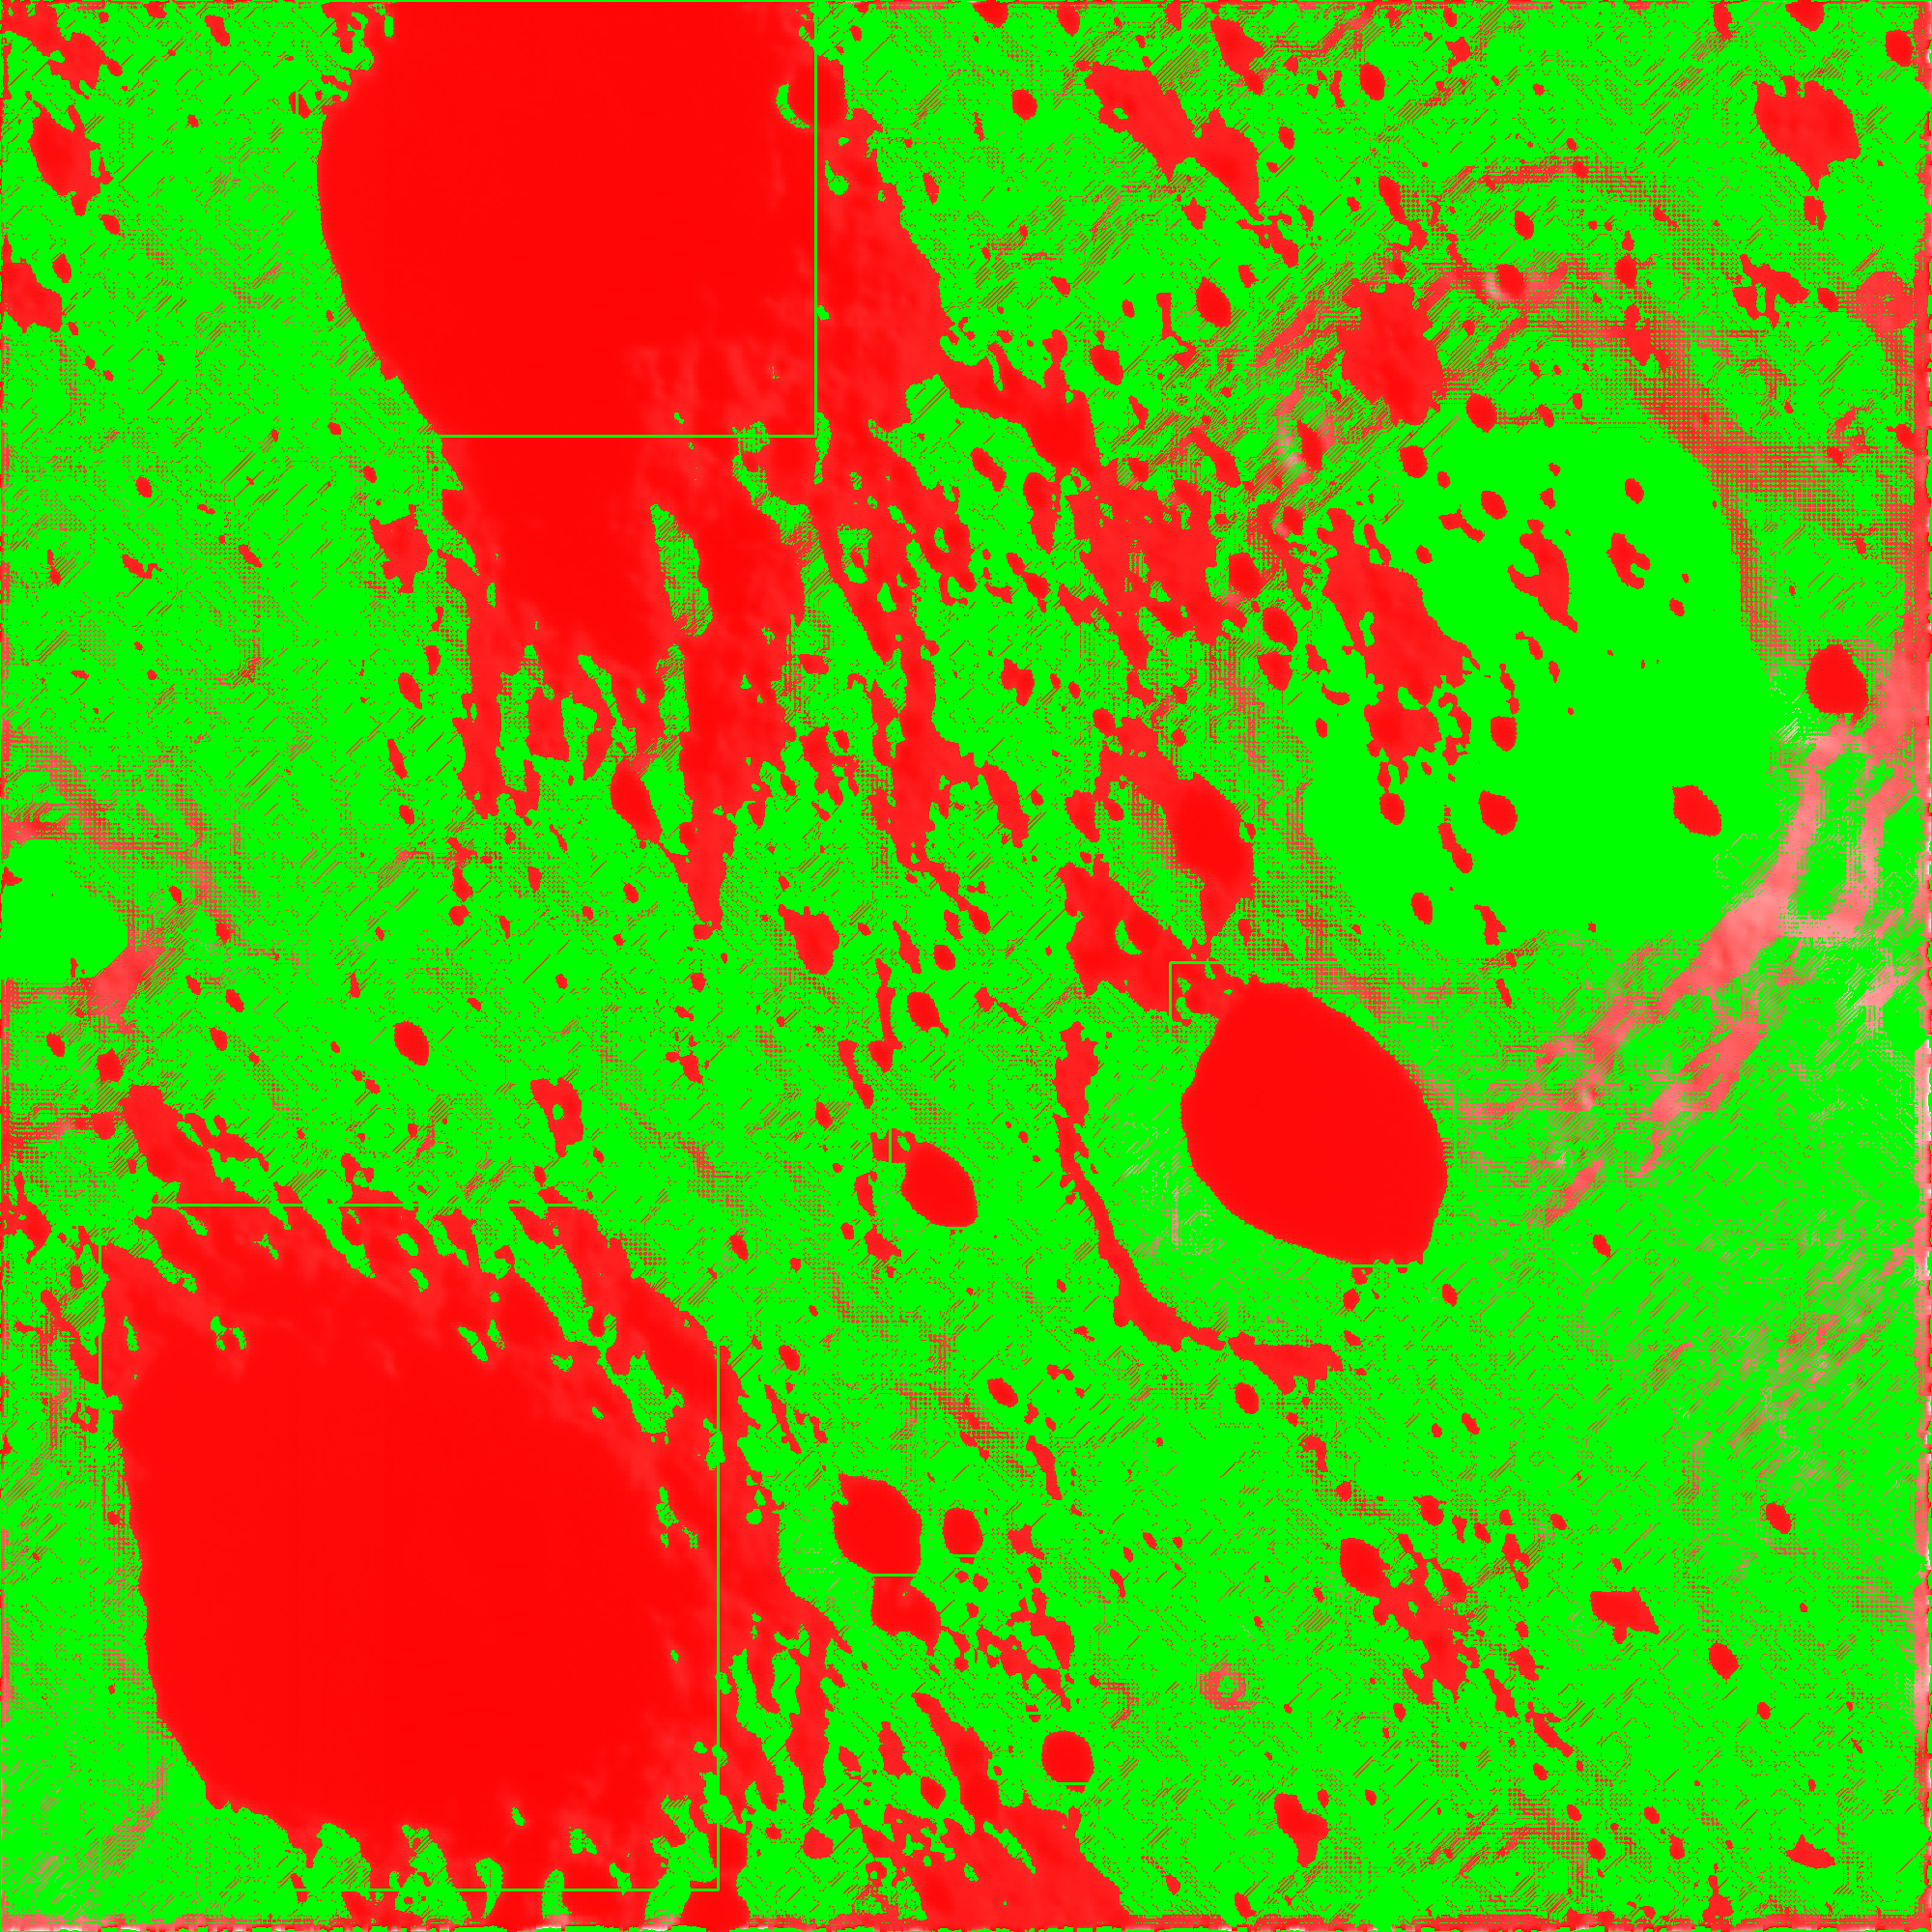

In [43]:
img5_img

In [44]:
with_slope = np.array(img5_img)

In [45]:
img5_img.save(r"D:/Projects/APEX PROJECT/Ongoing_Project/Lunar_Hazard_Map/notebooks/Hazard_Map/super_hazard_map_critical.tif")

ValueError: Could not save to JPEG for display

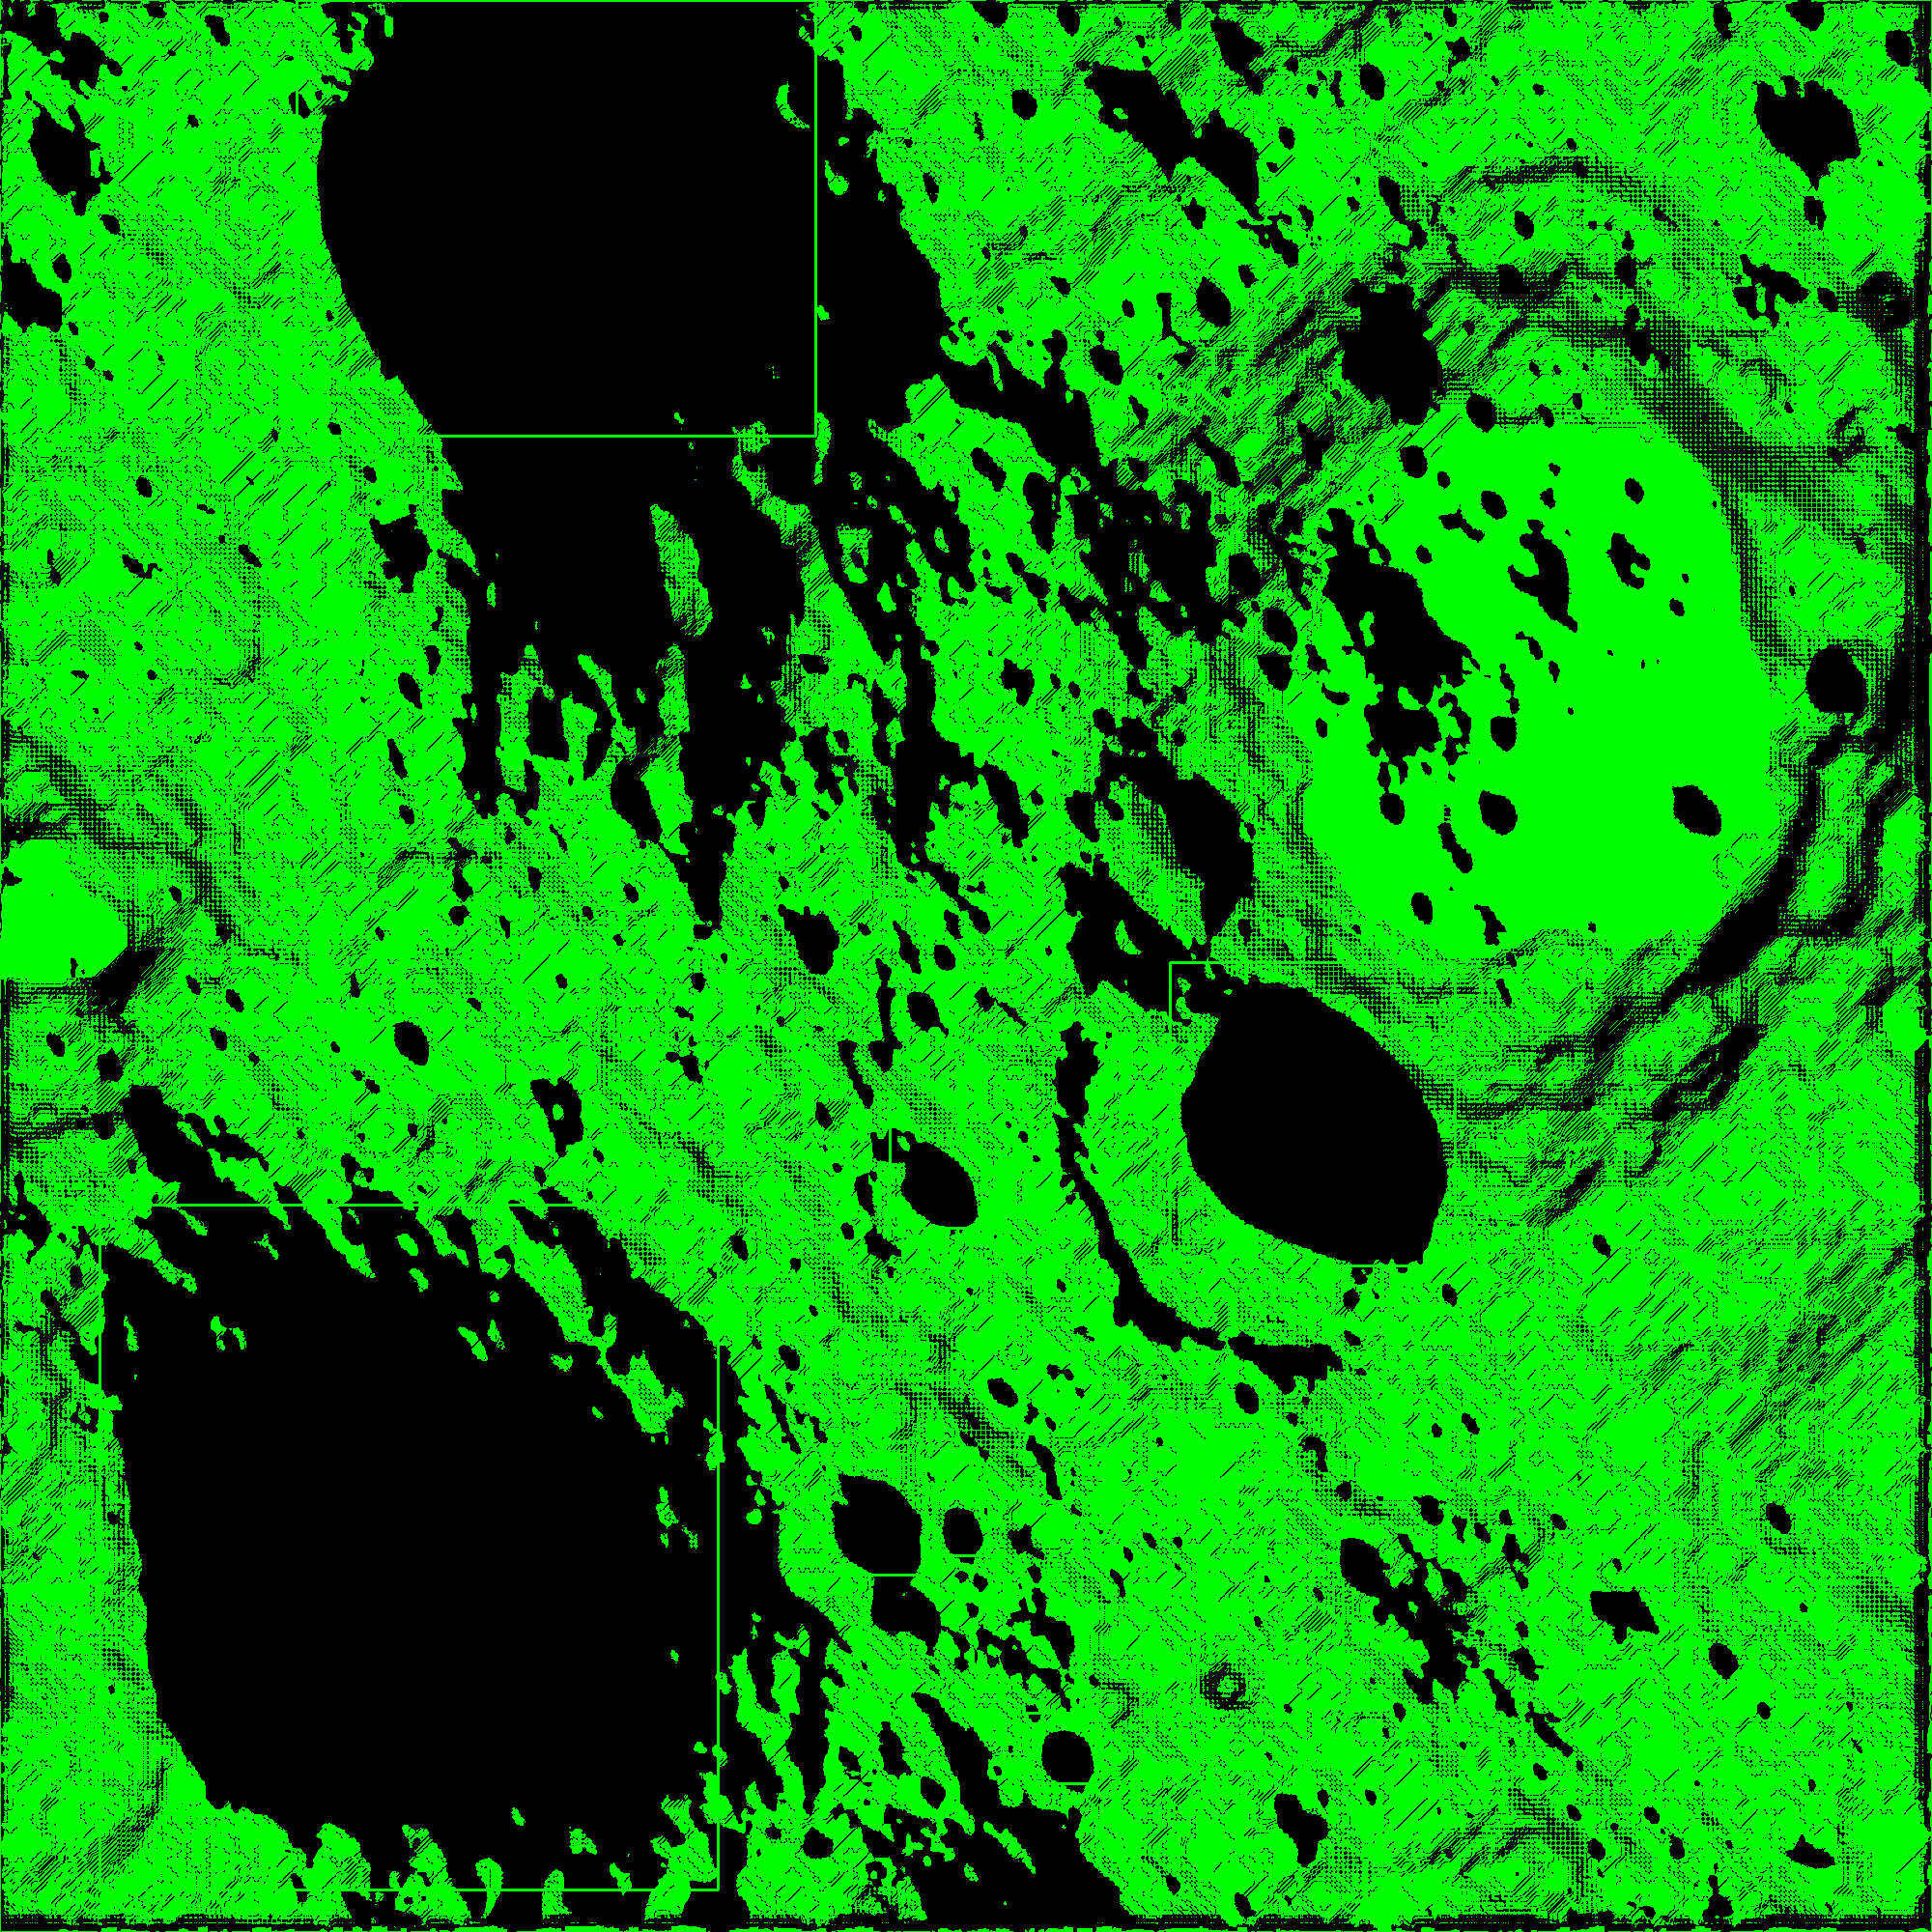

In [46]:
img4_img

In [47]:
img4_img.save(r"D:/Projects/APEX PROJECT/Ongoing_Project/Lunar_Hazard_Map/notebooks/Hazard_Map/super_hazard_mask_critical.tif")

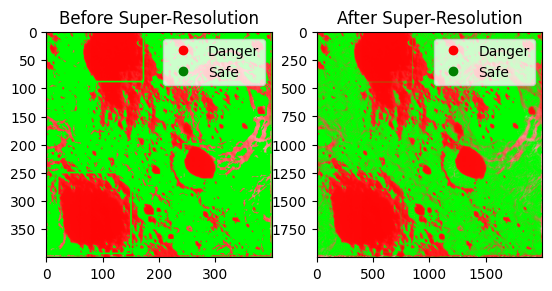

In [50]:
plt.subplot(1,2,1)
plt.imshow(without_slope)
plt.legend(handles=[
    plt.Line2D([], [], marker='o', linestyle='None', color='red', label='Danger'),
    plt.Line2D([], [], marker='o', linestyle='None', color='green', label='Safe')
])
plt.title("Before Super-Resolution")
plt.subplot(1,2,2)
plt.imshow(with_slope)
plt.legend(handles=[
    plt.Line2D([], [], marker='o', linestyle='None', color='red', label='Danger'),
    plt.Line2D([], [], marker='o', linestyle='None', color='green', label='Safe')
])
plt.title("After Super-Resolution")
plt.savefig(r"D:/Projects/APEX PROJECT/Ongoing_Project/Lunar_Hazard_Map/notebooks/Hazard_Map/super_hazard_critical_compare.png")